In [2]:
import numpy as np
import cv2
from scipy.signal import convolve2d

In [3]:
def conv(img, filtr, mode='same'):
    res = convolve2d(img, filtr, mode=mode)
    
    res_ = res.copy()
    res_[res_ < 0] = 0
    
    return res_


In [4]:
sobel_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

sobel_x= np.array([
    [-1, -2, 1],
    [0, 0, 0],
    [-1, 2, 1]
])

In [5]:
img = cv2.cvtColor( cv2.imread('../lena.png'), cv2.COLOR_BGR2GRAY)

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.gray()

<Figure size 432x288 with 0 Axes>

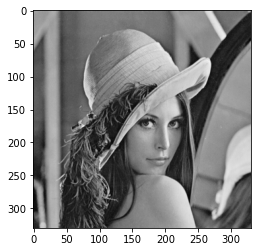

In [8]:
plt.imshow(img)

In [9]:
img.shape

(330, 330)

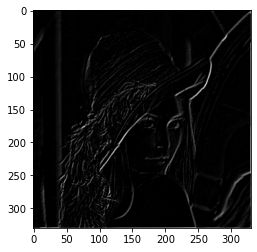

In [10]:
img_conv_x = conv(img, sobel_x)
plt.imshow(img_conv_x)

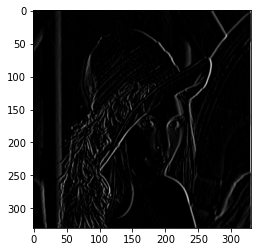

In [11]:
img_conv_y = conv(img, sobel_y)
img_conv_y=  conv(img, sobel_y)
plt.imshow(img_conv_y)

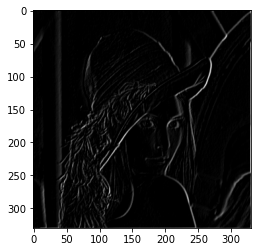

In [12]:
g = np.abs( img_conv_x) + np.abs(img_conv_y)
plt.imshow(g)

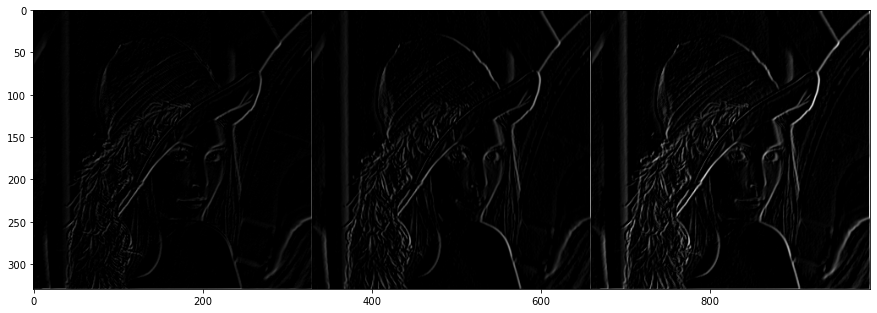

In [13]:
plt.figure(figsize=(15, 15))

plt.imshow(np.hstack([img_conv_x, img_conv_y, g]))

In [14]:
from scipy.ndimage import convolve

In [15]:
lap_f = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1],
])

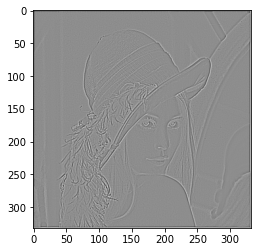

In [16]:
img_conv_lap_f = convolve2d(img, lap_f)
plt.imshow(img_conv_lap_f)

In [17]:
np.sum(img_conv_lap_f)

0

## detection of isolated points

In [18]:
img_1 = cv2.cvtColor( cv2.imread('./1.png'), cv2.COLOR_BGR2GRAY)

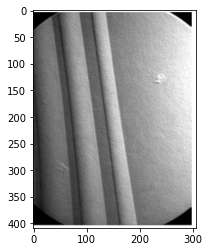

In [19]:
plt.imshow(img_1)

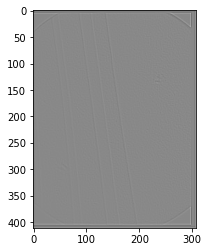

In [20]:
#applying LPF multiple times

n = 1
img_1_lp = convolve2d(img_1, lap_f)

    
plt.imshow(img_1_lp)

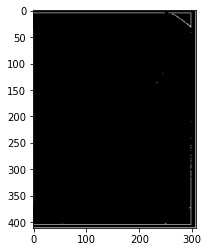

In [21]:
# we need to apply thresholding to get the result that we wanted

_, img_1_lp_th = cv2.threshold(img_1_lp.astype('float32'), 120, 255, cv2.THRESH_BINARY)
plt.imshow(img_1_lp_th)

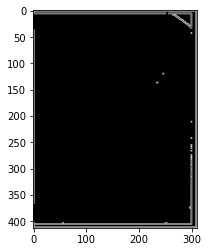

In [22]:
img_1_ff = convolve2d(img_1_lp_th, lap_f)
_, img_1_ff_th = cv2.threshold(img_1_ff.astype('float32'), 120, 255, cv2.THRESH_BINARY)

plt.imshow(img_1_ff_th)

# whoah! and we got what we wanted :)

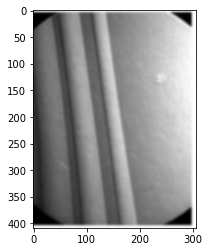

In [23]:
plt.imshow(cv2.GaussianBlur(img_1, (11, 11), 0))

In [24]:
from sklearn.preprocessing import MinMaxScaler

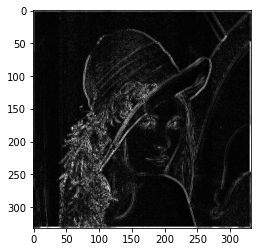

In [25]:
res = convolve2d(img, lap_f)

plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(res)))

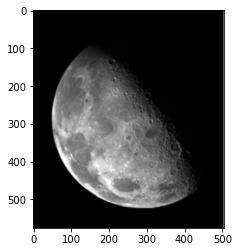

In [26]:
moon_img = cv2.cvtColor( cv2.imread('./moon.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(moon_img)

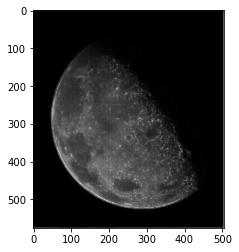

In [27]:
res2 = convolve2d(moon_img, lap_f, mode='same')

plt.imshow(moon_img + MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(res2)))

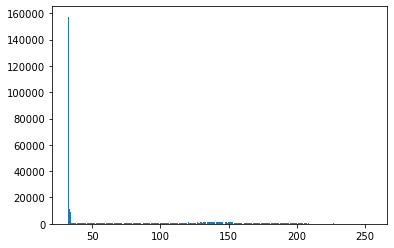

In [28]:
plt.hist(moon_img.ravel(), bins=256);

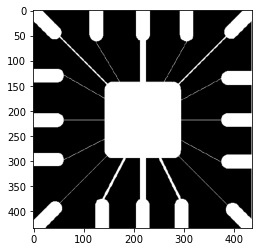

In [29]:
chip_img = cv2.cvtColor( cv2.imread('./chip.png'), cv2.COLOR_BGR2GRAY)

plt.imshow(chip_img)

In [30]:
chip_gx = convolve2d(chip_img, sobel_x)
chip_gy = convolve2d(chip_img, sobel_y)

In [31]:
plt.gray()

<Figure size 432x288 with 0 Axes>

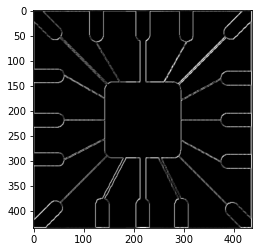

In [32]:
# plt.imshow(chip_gx)

plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(chip_gx)))

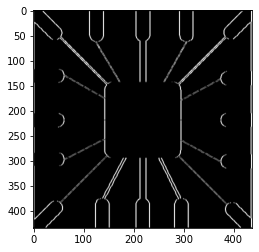

In [33]:
# plt.imshow(chip_gy)

plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(chip_gy)))

In [34]:
chip_g = abs(chip_gx) + abs(chip_gy)

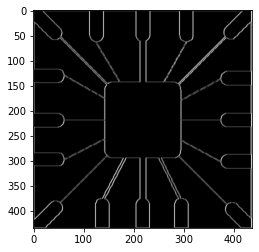

In [35]:
plt.imshow(chip_g)

In [36]:
f_45 = np.array([
    [2,-1,-1],
    [-1,2,-1],
    [-1,-1,2],
])

f_minus_45 = np.array([
    [-1,-1,2],
    [-1,2,-1],
    [2,-1,-1],
])

In [37]:
res_f_45 = convolve2d(chip_img, f_45)
res_f_minus_45 = convolve2d(chip_img, f_minus_45)

In [38]:
_, res_f_45_t = cv2.threshold(res_f_45.astype(np.float32), 254, 255, cv2.THRESH_BINARY)
_, res_f_minus_45_t = cv2.threshold(res_f_minus_45.astype(np.float32), 127, 255, cv2.THRESH_BINARY)

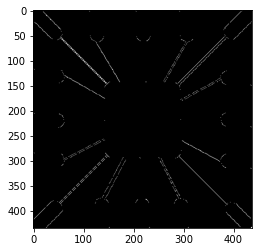

In [39]:
plt.imshow(res_f_45_t)

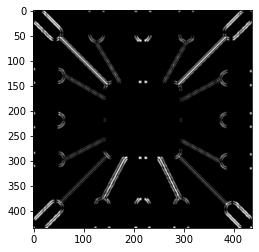

In [40]:
res_f_45_gblur = cv2.GaussianBlur(res_f_45.astype(np.float32), (5,5), 2)


plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(res_f_45_gblur)))

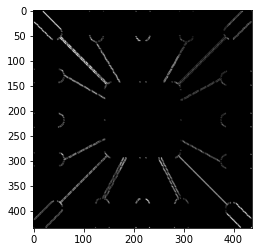

In [41]:
plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(res_f_45)))

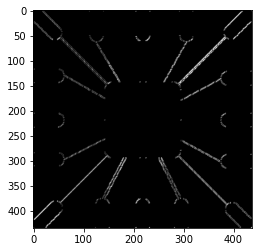

In [42]:
plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(res_f_minus_45)))

In [43]:
f_weird = np.array([
    [2,2,-1],
    [-1,-1,2],
    [-1,-1,-1],
])


In [44]:
sobel_y

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [45]:
sobel_x

array([[-1, -2,  1],
       [ 0,  0,  0],
       [-1,  2,  1]])

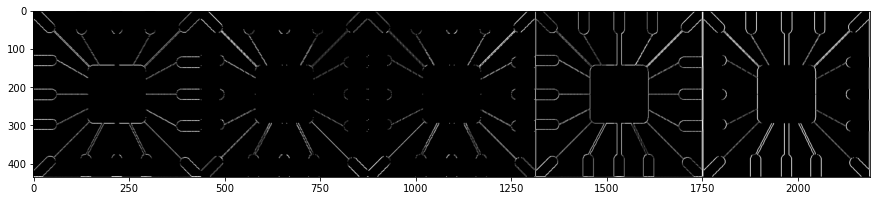

In [46]:
plt.figure(figsize=(15, 15))

res1 = MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(convolve2d(chip_img, f_weird)))
res2 = MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(convolve2d(chip_img, f_45)))
res3 = MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(convolve2d(chip_img, f_minus_45)))
res4 = MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(convolve2d(chip_img, sobel_x)))
res5 = MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(convolve2d(chip_img, sobel_y)))

plt.imshow(np.hstack([res1, res2, res3, res4, res5]))

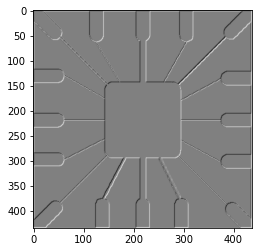

In [47]:
plt.imshow(chip_gx)

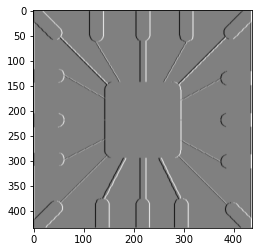

In [48]:
plt.imshow(chip_gy)

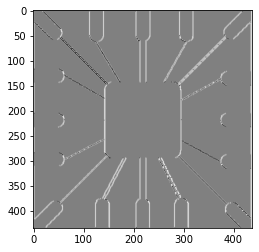

In [49]:
alpha = np.arctan(chip_gy / (chip_gx + 0.00001))

plt.imshow(alpha)

In [50]:
img1 = np.array([
    [1,1,1,1,1,1],
    [0,1,1,1,1,1],
    [0,0,1,1,1,1],
    [0,0,0,1,1,1],
    [0,0,0,0,1,1],
    [0,0,0,0,0,1]
])


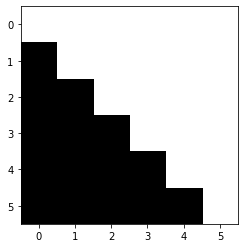

In [51]:
plt.imshow(img1)

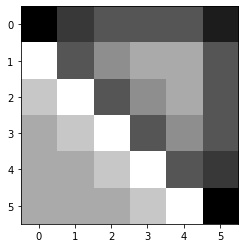

In [52]:
res = convolve2d(img1, lap_f, mode='same')

plt.imshow(res)

In [53]:
res

array([[-6, -4, -3, -3, -3, -5],
       [ 3, -3, -1,  0,  0, -3],
       [ 1,  3, -3, -1,  0, -3],
       [ 0,  1,  3, -3, -1, -3],
       [ 0,  0,  1,  3, -3, -4],
       [ 0,  0,  0,  1,  3, -6]])

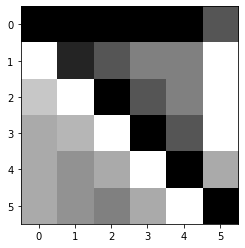

In [54]:
res_scaled = MinMaxScaler((0, 255)).fit_transform(res)

plt.imshow(res_scaled)

In [55]:
res_scaled

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  85.        ],
       [255.        ,  36.42857143,  85.        , 127.5       ,
        127.5       , 255.        ],
       [198.33333333, 255.        ,   0.        ,  85.        ,
        127.5       , 255.        ],
       [170.        , 182.14285714, 255.        ,   0.        ,
         85.        , 255.        ],
       [170.        , 145.71428571, 170.        , 255.        ,
          0.        , 170.        ],
       [170.        , 145.71428571, 127.5       , 170.        ,
        255.        ,   0.        ]])

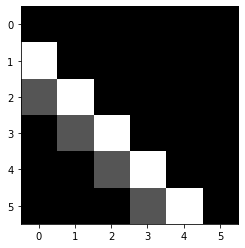

In [56]:
res2 = res.copy()
res2[res2 < 0] = 0

plt.imshow(res2)

In [57]:
img1_sob_x = convolve2d(img1, sobel_x, mode='same')
img1_sob_y = convolve2d(img1, sobel_y, mode='same')


img1_sob_x_ = img1_sob_x.copy()
img1_sob_y_ = img1_sob_y.copy()

img1_sob_x_[img1_sob_x_ < 0 ] = 0
img1_sob_y_[img1_sob_y_ < 0 ] = 0

img1_sob_x = img1_sob_x_.copy()
img1_sob_y = img1_sob_y_.copy()

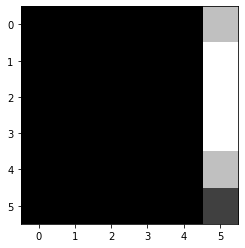

In [58]:
plt.imshow(img1_sob_y)

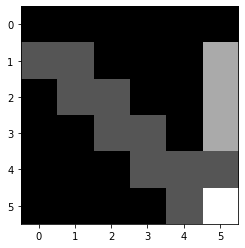

In [59]:
plt.imshow(img1_sob_x)

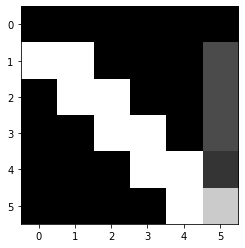

In [60]:
alpha = np.arctan(img1_sob_x / (img1_sob_y + 0.0001))
plt.imshow(alpha)

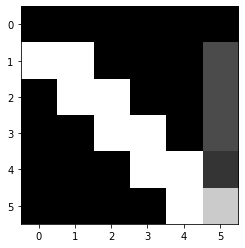

In [61]:
plt.imshow(np.rad2deg(alpha))

In [62]:
f_y_1d = np.array([
    [-1],
    [1]
])

f_x_1d = np.array([
    [-1, 1]
])

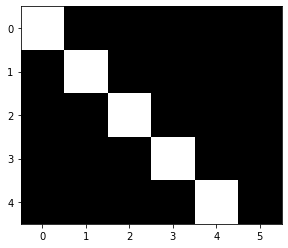

In [63]:
res_1d_y = convolve2d(img1, f_y_1d, mode='valid')

plt.imshow(res_1d_y)

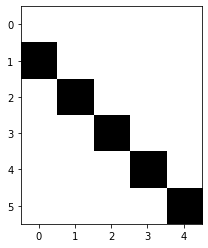

In [64]:
res_1d_x = convolve2d(img1, f_x_1d, mode='valid')

plt.imshow(res_1d_x)

In [65]:
res_1d_x

array([[ 0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0],
       [ 0,  0, -1,  0,  0],
       [ 0,  0,  0, -1,  0],
       [ 0,  0,  0,  0, -1]])

In [66]:
prewitt_y = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1],
])

prewitt_x = prewitt_y.T

In [67]:
px_lena = conv(img, prewitt_x)
py_lena = conv(img, prewitt_y)

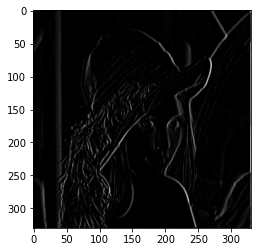

In [68]:
plt.imshow(px_lena)

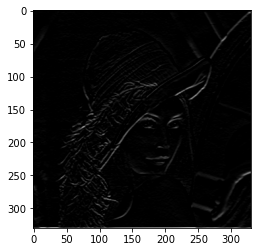

In [69]:
plt.imshow(py_lena)

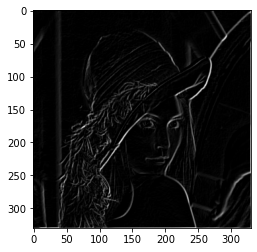

In [70]:
p_res = abs(py_lena) + abs(px_lena)

plt.imshow(p_res)

## comparison of noise suppression between Sobel and Prewitt filters

In [71]:
n0 = cv2.cvtColor( cv2.imread('./noise_0.png'), cv2.COLOR_BGR2GRAY)
n1 = cv2.cvtColor( cv2.imread('./noise_1.png'), cv2.COLOR_BGR2GRAY)
n2 = cv2.cvtColor( cv2.imread('./noise_2.png'), cv2.COLOR_BGR2GRAY)
n3 = cv2.cvtColor( cv2.imread('./noise_3.png'), cv2.COLOR_BGR2GRAY)

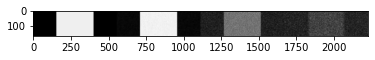

In [72]:
plt.imshow(np.hstack([n0, n1, n2, n3]))

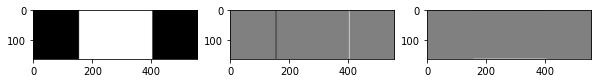

In [73]:
n0_px = convolve2d(n0, prewitt_x, mode='same')
n0_py = convolve2d(n0, prewitt_y, mode='same')

fig, ax = plt.subplots(1, 3, figsize=(10, 15))

ax[0].imshow(n0)
ax[1].imshow(n0_px)
ax[2].imshow(n0_py)

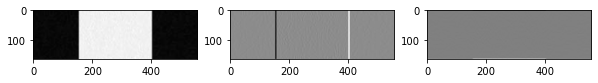

In [74]:
n1_px = convolve2d(n1, prewitt_x, mode='same')
n1_py = convolve2d(n1, prewitt_y, mode='same')

fig, ax = plt.subplots(1, 3, figsize=(10, 15))

ax[0].imshow(n1)
ax[1].imshow(n1_px)
ax[2].imshow(n1_py)

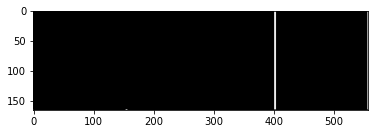

In [75]:
plt.imshow(MinMaxScaler((0, 255)).fit_transform(n0_px))

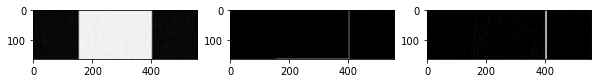

In [76]:
n1_sx = conv(n1, sobel_x)
n1_sy = conv(n1, sobel_y)

fig, ax = plt.subplots(1, 3, figsize=(10, 15))

ax[0].imshow(n1)
ax[1].imshow(n1_sx)
ax[2].imshow(n1_sy)

In [77]:
def apply_filters_to_noise(noise_img):
    n_sx = cv2.Sobel(noise_img, cv2.CV_32F, 1, 0)
    n_smotthed = cv2.GaussianBlur(n_sx, (3,3), 5)
    n_sx_smotthed = cv2.Sobel(n_smotthed, cv2.CV_32F, 1, 0)

    fig, ax = plt.subplots(1, 4, figsize=(10, 20))

    ax[0].imshow(noise_img)
    ax[1].imshow(n_sx)
    ax[2].imshow(n_smotthed)
    ax[3].imshow(n_sx_smotthed)
    

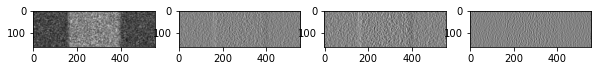

In [78]:
apply_filters_to_noise(n3)

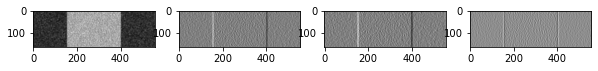

In [79]:
apply_filters_to_noise(n2)

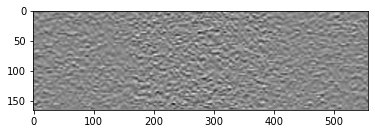

In [80]:
plt.imshow(cv2.Sobel(n3, cv2.CV_32F, 0, 1))

# Kirsch compass kernels

In [81]:
kirsch_n = np.array([
    [-3,-3,5],
    [-3,0,5],
    [-3,-3,5],
])

kirsch_nw = np.array([
    [-3,5,5],
    [-3,0,5],
    [-3,-3,-3],
])
    
kirsch_w = np.array([
    [5,5,5],
    [-3,0,-3],
    [-3,-3,-3],
])
    
kirsch_sw = np.array([
    [5,5,-3],
    [5,0,-3],
    [-3,-3,-3],
])

kirsch_s = np.array([
    [5,-3,-3],
    [5,0,-3],
    [5,-3,-3],
])

kirsch_se = np.array([
    [-3,-3,-3],
    [-3,0,5],
    [-3,5,5],
])
    
kirsch_e = np.array([
    [-3,-3,-3],
    [-3,0,-3],
    [5,5,5],
])
    
kirsch_ne = np.array([
    [-3,-3,-3],
    [-3,0,5],
    [-3,5,5],
])

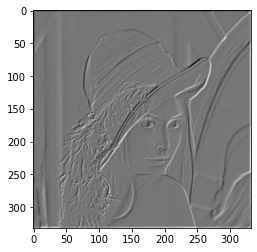

In [82]:
plt.imshow(convolve2d(img, kirsch_ne))

# combining thresholding with gridient

In [83]:
roof = cv2.cvtColor( cv2.imread('./roof.png'), cv2.COLOR_BGR2GRAY)

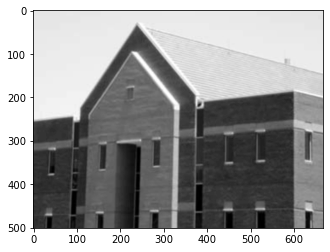

In [84]:
roof = roof / 255.0

plt.imshow(roof)

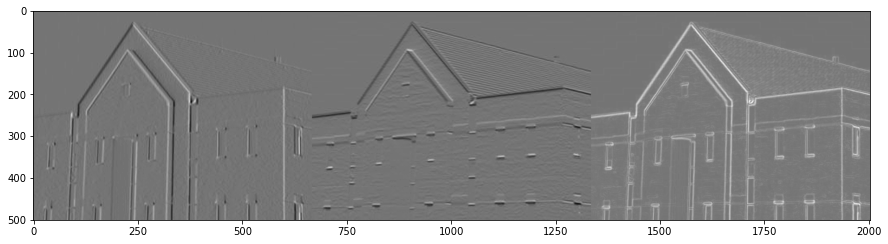

In [85]:
roof_sx = cv2.Sobel(roof, -1, 1, 0)
roof_sy = cv2.Sobel(roof, -1, 0, 1)

roof_g = abs(roof_sx) + abs(roof_sy)

plt.figure(figsize=(15, 5))
plt.imshow(np.hstack([roof_sx, roof_sy, roof_g]))

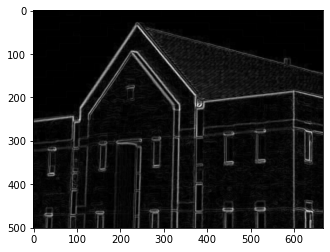

In [86]:
roof_g_ = roof_g.copy()
roof_g_[roof_g_ < 0] = 0
roof_g = roof_g_.copy()

plt.imshow(roof_g)

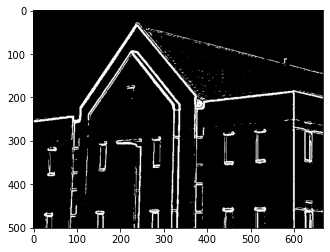

In [87]:
plt.imshow(cv2.threshold(roof_g, 0.4, 1, cv2.THRESH_BINARY)[1])

In [88]:
def calc_sobel_g(img):
    img_sx = cv2.Sobel(img, -1, 1, 0)
    img_sy = cv2.Sobel(img, -1, 0, 1)

    img_g = abs(img_sx) + abs(img_sy)

    return img_sx, img_sy, img_g

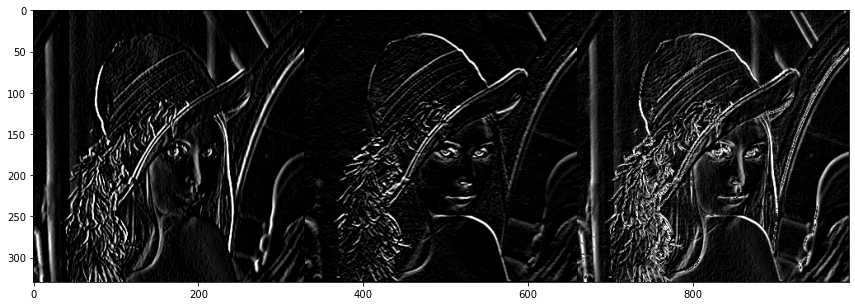

In [89]:
img_sx, img_sy, img_g = calc_sobel_g(img)

plt.figure(figsize=(15, 5))
plt.imshow(np.hstack([img_sx, img_sy, img_g]))

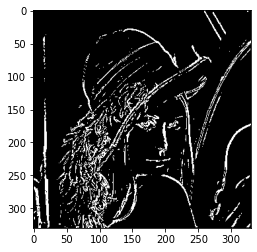

In [90]:
plt.imshow(cv2.threshold(img_g, 100, 255, cv2.THRESH_BINARY)[1])

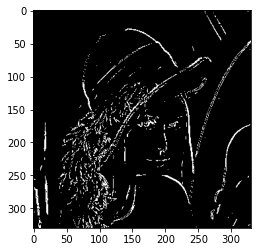

In [91]:
img_blur = cv2.GaussianBlur(img, (7, 7), 5)
img_g_blur_x, img_g_blur_y, img_g_blur = calc_sobel_g(img)


plt.imshow(cv2.threshold(img_g_blur, 150, 255, cv2.THRESH_BINARY)[1])

## laplace of Gaussians

In [92]:
log_f = np.array([
    [0,0,-1,0,0],
    [0,-1,-2,-1,0],
    [-1,-2,16,-2,-1],
    [0,-1,-2,-1,0],
    [0,0,-1,0,0],
])

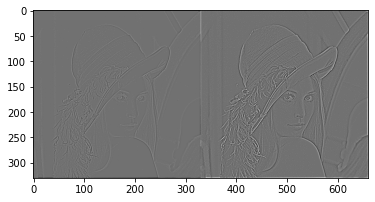

In [93]:
log_res=  convolve2d(img, log_f, mode='same')
lap_res=  convolve2d(img, lap_f, mode='same')

plt.imshow(np.hstack([
    lap_res, log_res
]))

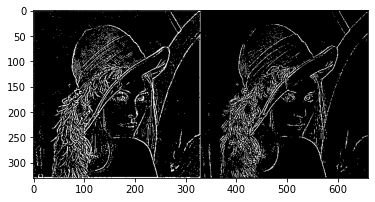

In [94]:
t, log_res_th = cv2.threshold(log_res.astype(np.float32), 100, 255, cv2.THRESH_BINARY)
t, lap_res_th = cv2.threshold(lap_res.astype(np.float32), 70, 255, cv2.THRESH_BINARY)

plt.imshow(np.hstack([
    log_res_th, lap_res_th
]))

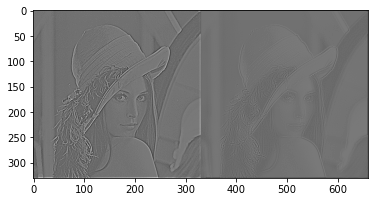

In [95]:
log_res_add = img + log_res
lap_res_add = img + lap_res

plt.imshow(np.hstack([
    log_res_add, lap_res_add
]))

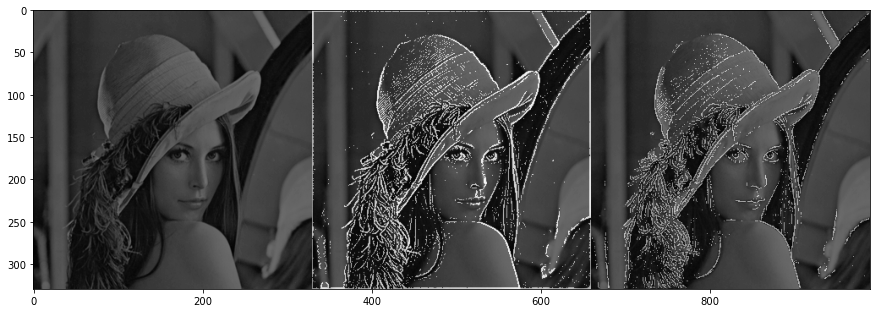

In [96]:
log_res_add_th = img + log_res_th
lap_res_add_th = img +lap_res_th

plt.figure(figsize=(15, 15))

plt.imshow(np.hstack([
    img, log_res_add_th, lap_res_add_th
]))

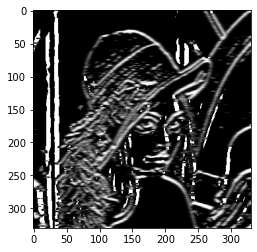

In [97]:
from scipy.ndimage import gaussian_laplace

plt.imshow(gaussian_laplace(img, sigma=2))

# canny edge detector

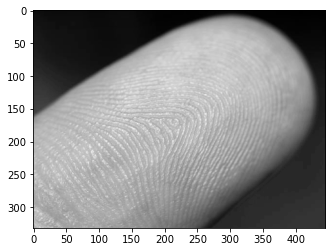

In [98]:
fp = cv2.cvtColor( cv2.imread('./fingerprint.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(fp)

<Figure size 1080x1080 with 0 Axes>

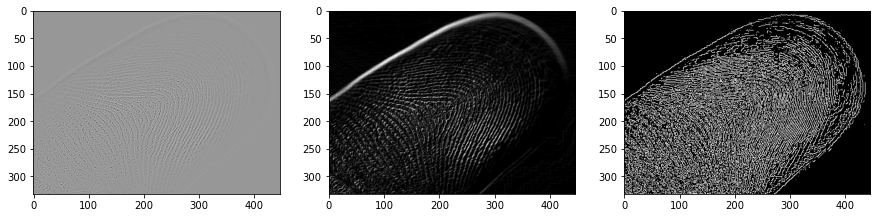

In [99]:
fp_lap = cv2.Laplacian(fp, cv2.CV_64F)

fp_sob_x = cv2.Sobel(fp, -1, 1, 0)
fp_sob_y = cv2.Sobel(fp, -1, 0, 1)
fp_sob = abs(fp_sob_x) + abs(fp_sob_y)

fp_can = cv2.Canny(fp, 20, 20)

plt.figure(figsize=(15, 15))


fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(fp_lap)
ax[1].imshow(fp_sob)
ax[2].imshow(fp_can)

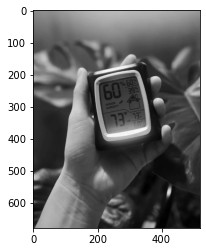

In [100]:
# fun

hw =  cv2.cvtColor( cv2.imread('./hand_watch.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(hw)

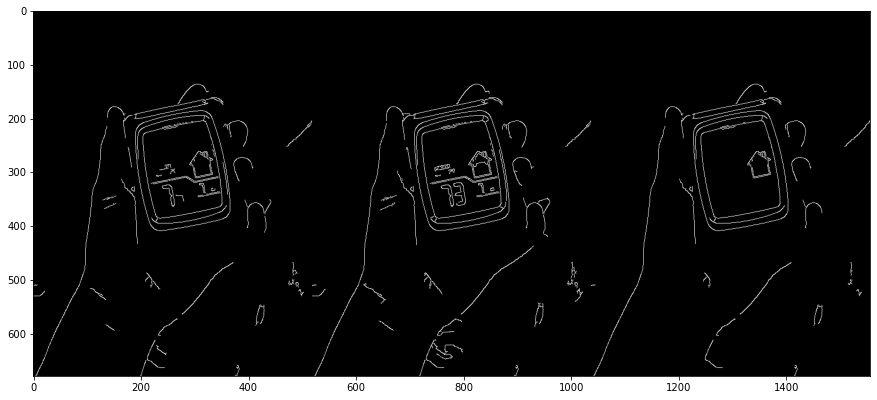

In [101]:
plt.figure(figsize=(15, 15))

hw_canny_1 = cv2.Canny(hw, 100, 200)
hw_canny_2 = cv2.Canny(hw, 70, 200)
hw_canny_3 = cv2.Canny(hw, 100, 250)
# hw_canny_4 = cv2.Canny(hw, 100, 200)

plt.imshow(np.hstack([hw_canny_1, hw_canny_2, hw_canny_3]))

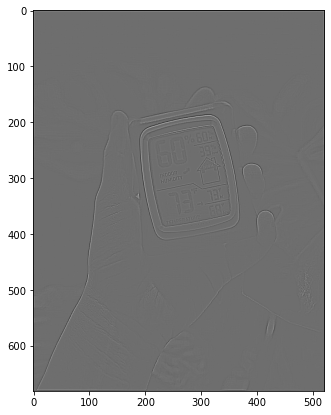

In [102]:
# applying high pass filter

lpf = 1/9 *np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1],
])

impluse_3 = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0],
])

hpf = impluse_3 - lpf

plt.figure(figsize=(7, 7))

plt.imshow(convolve2d(hw, hpf))

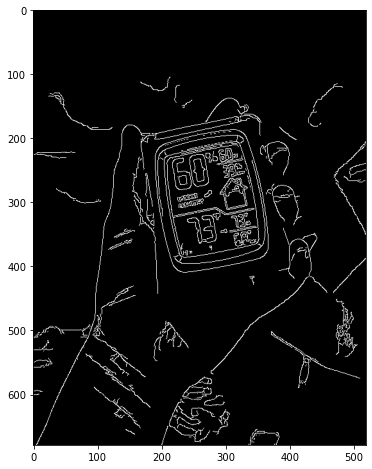

In [103]:
# automaticlly find the T_low and T_high in Canny edge detector algo

def auto_canny(img, sigma=0.33):
    md = np.median(img)
    l_val = int(max(0, (1.0 - sigma) * md))
    h_val = int(min(255, (1.0 + sigma) * md))
    
    return cv2.Canny(img, l_val, h_val)

plt.figure(figsize=(8,8))
plt.imshow(auto_canny(hw, 0.5))

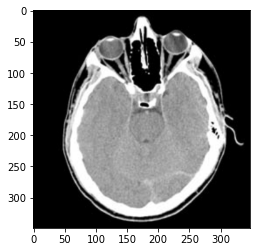

In [104]:
# skull image edge detection

sk_img = cv2.cvtColor( cv2.imread('./skull.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(sk_img)

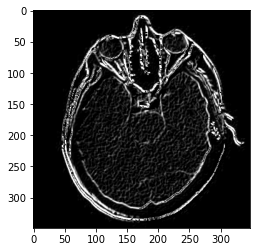

In [105]:
# sobel
sk_sob = abs(cv2.Sobel(sk_img, -1, 1, 0)) + abs(cv2.Sobel(sk_img, -1, 0, 1))

plt.imshow(sk_sob)

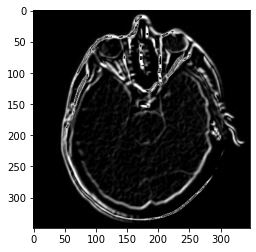

In [106]:
# guassian + sobel
sk_smooth = cv2.GaussianBlur(sk_img, (5,5), 5)

sk_sob_smooth = abs(cv2.Sobel(sk_smooth, -1, 1, 0)) + abs(cv2.Sobel(sk_smooth, -1, 0, 1))

plt.imshow(sk_sob_smooth)

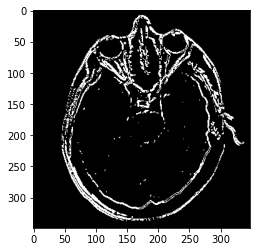

In [107]:
# sobel + thresholding
sk_sob = abs(cv2.Sobel(sk_img, -1, 1, 0)) + abs(cv2.Sobel(sk_img, -1, 0, 1))
_, sk_sob_th = cv2.threshold(sk_sob, 100, 255, cv2.THRESH_BINARY)

plt.imshow(sk_sob_th)

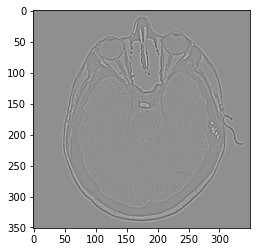

In [108]:
# laplacian

sk_lap = convolve2d(sk_img, lap_f)
plt.imshow(sk_lap)

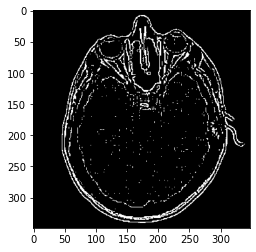

In [109]:
# laplacian + thresholding

sk_lap = convolve2d(sk_img, lap_f, mode='same')
_, sk_lap_th = cv2.threshold(sk_lap.astype(np.float32), 50, 255, cv2.THRESH_BINARY)

plt.imshow(sk_lap_th)

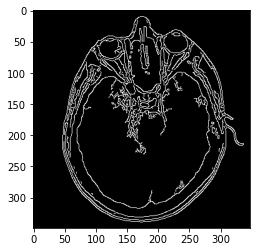

In [110]:
# canny 

sk_canny = cv2.Canny(sk_img, 30, 200)
plt.imshow(sk_canny)

## hough transform

In [111]:
import cv2
import numpy as np

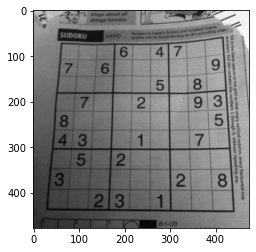

In [136]:
sod_img = cv2.cvtColor(cv2.imread('./sudoku.jpg'), cv2.COLOR_BGR2GRAY)

plt.imshow(sod_img)

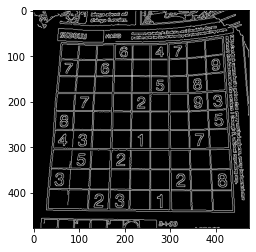

In [137]:
sod_edges = cv2.Canny(sod_img, 50, 100)
plt.imshow(sod_edges)

In [273]:
def draw_hough_lines(edges_highlighted_img, dst_img, hough_threshold):
    eh_img = np.copy(edges_highlighted_img)
    lines = cv2.HoughLines(eh_img, 1, np.pi/180, hough_threshold)
    
    dst_img_cp = np.copy(dst_img)
    
    # The below for loop runs till r and theta values
    # are in the range of the 2d array
    for r_theta in lines:
        arr = np.array(r_theta[0], dtype=np.float64)
        r, theta = arr
        # Stores the value of cos(theta) in a
        a = np.cos(theta)

        # Stores the value of sin(theta) in b
        b = np.sin(theta)

        # x0 stores the value rcos(theta)
        x0 = a*r

        # y0 stores the value rsin(theta)
        y0 = b*r

        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 1000*(-b))

        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 1000*(a))

        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 1000*(-b))

        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 1000*(a))

        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be
        # drawn. In this case, it is red.
        cv2.line(dst_img_cp, (x1, y1), (x2, y2), (0, 0, 255), 2)
        
    return dst_img_cp

[[[ 2.5600000e+02  0.0000000e+00]]

 [[ 3.0300000e+02  1.5707964e+00]]

 [[ 2.6400000e+02  1.5707964e+00]]

 [[ 1.8300000e+02  3.4906585e-02]]

 [[ 1.8000000e+02  3.4906585e-02]]

 [[ 2.5800000e+02  0.0000000e+00]]

 [[ 2.1800000e+02  1.7453292e-02]]

 [[ 2.6200000e+02  1.5707964e+00]]

 [[ 1.8000000e+02  1.5707964e+00]]

 [[ 3.5000000e+02  1.5707964e+00]]

 [[ 7.0000000e+01  8.7266460e-02]]

 [[-2.9300000e+02  3.1241393e+00]]

 [[-3.3400000e+02  3.1066861e+00]]

 [[ 1.4500000e+02  5.2359879e-02]]

 [[ 1.8300000e+02  1.5707964e+00]]

 [[ 3.9400000e+02  1.5707964e+00]]

 [[-3.7000000e+02  3.0892327e+00]]

 [[-3.3200000e+02  3.1066861e+00]]

 [[-3.7300000e+02  3.0892327e+00]]

 [[ 6.7000000e+01  8.7266460e-02]]

 [[ 2.6200000e+02  1.7453292e-02]]

 [[-2.9600000e+02  3.1241393e+00]]

 [[ 1.4300000e+02  1.5707964e+00]]

 [[-4.3300000e+02  3.0717795e+00]]

 [[ 1.4200000e+02  5.2359879e-02]]

 [[-4.1100000e+02  3.0717795e+00]]

 [[ 2.2300000e+02  1.5707964e+00]]

 [[ 1.4600000e+02  1.5707964

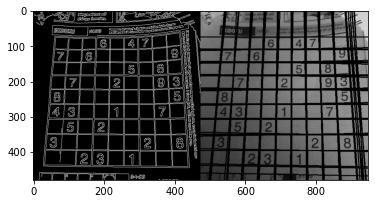

In [209]:
sod_img_lines  = draw_hough_lines(sod_edges, sod_img, 100)

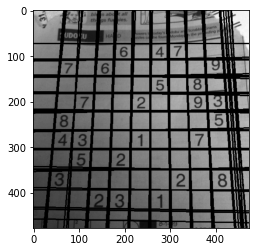

In [147]:
plt.imshow(sod_img_lines)

In [274]:
# exercises of https://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm

star_img = cv2.cvtColor( cv2.imread('../chap10/star.png'), cv2.COLOR_BGR2GRAY)
rect_img = cv2.cvtColor( cv2.imread('../chap10/triangle.png'), cv2.COLOR_BGR2GRAY)
tri_img = cv2.cvtColor( cv2.imread('../chap10/rectangle.png'), cv2.COLOR_BGR2GRAY)

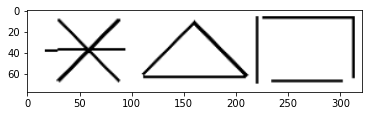

In [275]:
plt.imshow(np.hstack([star_img, rect_img, tri_img]))

In [276]:
star_img_canny = cv2.Canny(star_img, 50, 100)
rect_img_canny = cv2.Canny(rect_img, 50, 100)
tri_img_canny = cv2.Canny(tri_img, 50, 100)

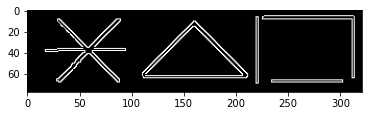

In [281]:
plt.imshow(np.hstack([star_img_canny, rect_img_canny, tri_img_canny]))

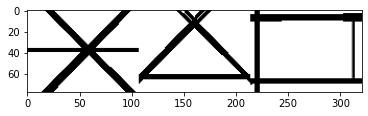

In [294]:
th = 60

star_img_hough = draw_hough_lines(star_img_canny, star_img, th)
rect_img_hough = draw_hough_lines(rect_img_canny, rect_img, th);
tri_img_hough = draw_hough_lines(tri_img_canny, tri_img, th);

plt.imshow(np.hstack([star_img_hough, rect_img_hough, tri_img_hough]))

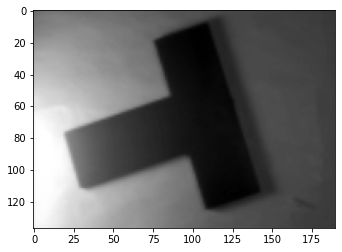

In [385]:
# 3

t_img = cv2.cvtColor( cv2.imread('../chap10/t.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(t_img)

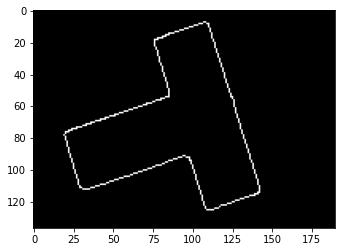

In [296]:
t_img_canny = cv2.Canny(t_img, 50, 100)
plt.imshow(t_img_canny)

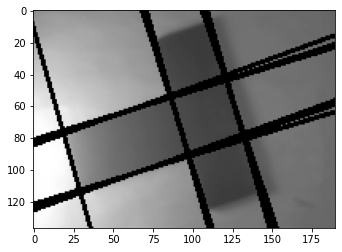

In [306]:
t_img_hough = draw_hough_lines(t_img_canny, t_img, 28)
plt.imshow(t_img_hough)

In [330]:
# testing Hough transform robustness

def hough_on_blured_canny_of_t(blur_intensity):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    if blur_intensity == 1:
        ksize = (3,3)
        std = 3
    
    elif blur_intensity == 2:
        ksize = (5,5)
        std = 5
    
    elif blur_intensity == 3:
        ksize = (7,7)
        std = 7
        
    elif blur_intensity == 4:
        ksize = (9,9)
        std = 9
    
    else:
        raise Exception('only choose from 1, 2, 3')

    t_img_canny_blur = cv2.GaussianBlur(t_img_canny, ksize, std)
    ax[0].imshow(t_img_canny_blur)
    
    t_img_canny_blur_hough = draw_hough_lines(t_img_canny_blur, t_img, 70)
    ax[1].imshow(t_img_canny_blur_hough)

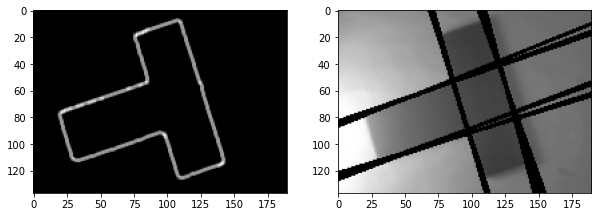

In [331]:
hough_on_blured_canny_of_t(1)

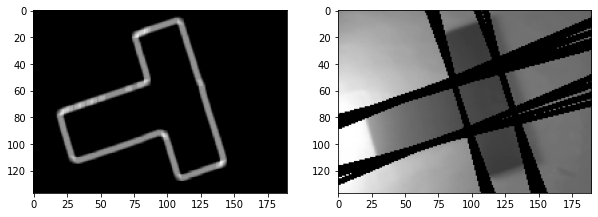

In [332]:
hough_on_blured_canny_of_t(2)

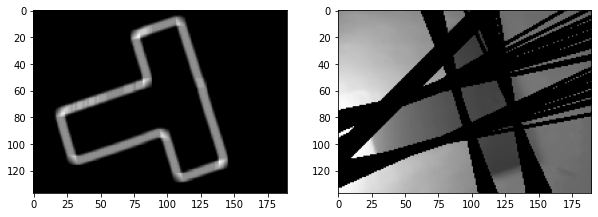

In [333]:
hough_on_blured_canny_of_t(3)

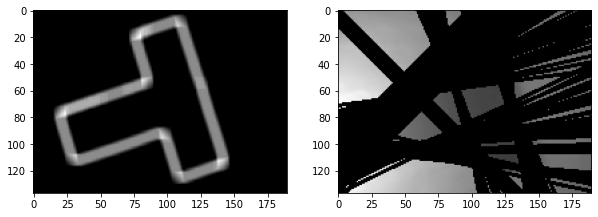

In [334]:
hough_on_blured_canny_of_t(4)

In [374]:
np.random.rand()

0.03112045891870374

In [486]:
# applying salt and pepper noise

def add_salt_and_pepper_noise(img, m):
    img_cp = np.copy(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.random.rand() < m*0.1:
                img_cp[i][j] = 0
        
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.random.rand() < m*0.1:
                img_cp[i][j] = 255
        
    
    return img_cp


def hough_on_noisy_canny_of_t(img, intensity, hough_th):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    if intensity == 1:
        t_img_canny_noisy = add_salt_and_pepper_noise(img, 0.1)
    
    elif intensity == 2:
        t_img_canny_noisy = add_salt_and_pepper_noise(img, 0.2)
    
    elif intensity == 3:
        t_img_canny_noisy = add_salt_and_pepper_noise(img, 0.4)
        
    elif intensity == 4:
        t_img_canny_noisy = add_salt_and_pepper_noise(img, 0.7)
        
    elif intensity == 5:
        t_img_canny_noisy = add_salt_and_pepper_noise(img, 0.9)
    
    else:
        raise Exception('only choose from 1, 2, 3')
    
    ax[0].imshow(t_img_canny_noisy)
    
    t_img_canny_noisy_hough = draw_hough_lines(t_img_canny_noisy, t_img, hough_th)
    ax[1].imshow(t_img_canny_noisy_hough)

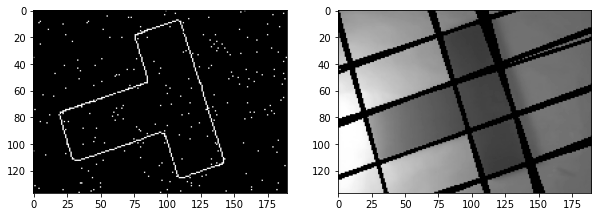

In [462]:
hough_on_noisy_canny_of_t(t_img_canny, 1, 25)

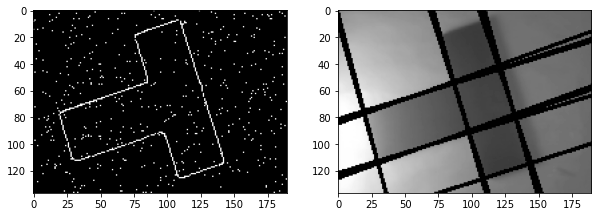

In [465]:
hough_on_noisy_canny_of_t(t_img_canny, 2, 30)

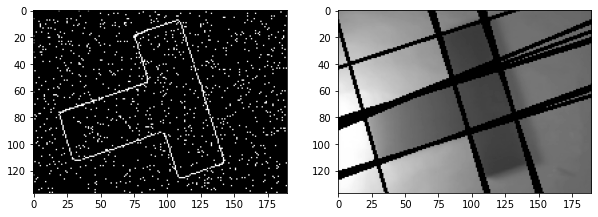

In [471]:
hough_on_noisy_canny_of_t(t_img_canny, 3, 31)

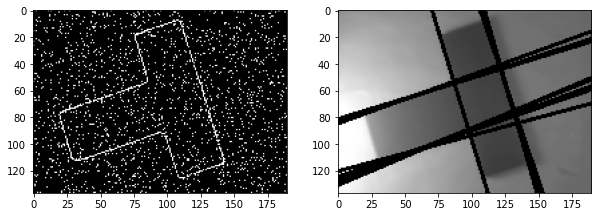

In [484]:
hough_on_noisy_canny_of_t(t_img_canny, 4, 37)

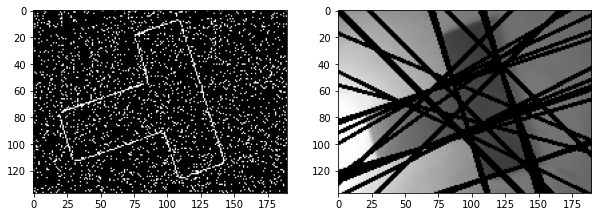

In [495]:
hough_on_noisy_canny_of_t(t_img_canny, 5, 36)

In [497]:
kaftar_img = cv2.cvtColor( cv2.imread('../chap10/kaftar.png'), cv2.COLOR_BGR2GRAY)
land_img = cv2.cvtColor( cv2.imread('../chap10/land.png'), cv2.COLOR_BGR2GRAY)

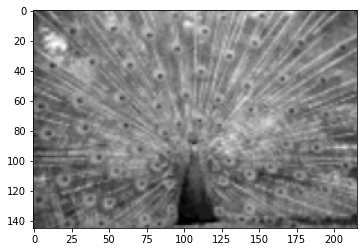

In [499]:
plt.imshow(kaftar_img)

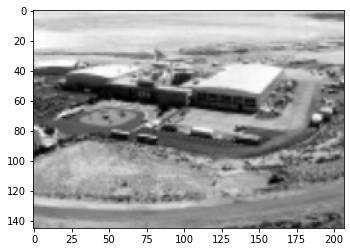

In [498]:
plt.imshow(land_img)

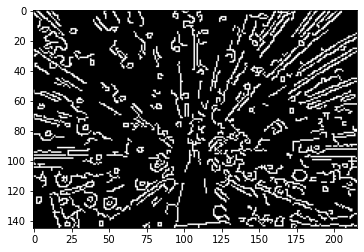

In [510]:
kaftar_img_canny = cv2.Canny(kaftar_img, 80, 150)
plt.imshow(kaftar_img_canny)

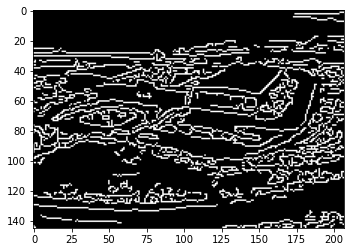

In [512]:
land_img_canny = cv2.Canny(land_img, 100, 150)
plt.imshow(land_img_canny)

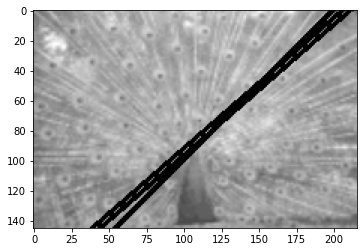

In [520]:
kaftar_img_hough= draw_hough_lines(kaftar_img_canny, kaftar_img, 80)
plt.imshow(kaftar_img_hough)

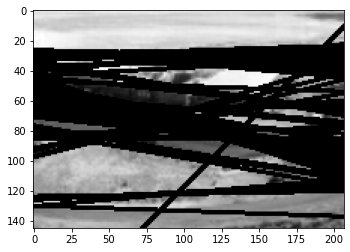

In [528]:
land_img_hough= draw_hough_lines(land_img_canny, land_img, 70)
plt.imshow(land_img_hough)